### Tidally induced bar


Notebook para análise de uma galáxia da IllustrisTNG-50 que tem barra induzida por interação com outra galáxia.

Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy import stats
from scipy.signal import savgol_filter
from astropy.cosmology import FlatLambdaCDM
from functions import *

Parâmetros para figuras

In [2]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 20

Variáveis e caminhos

In [3]:
path = 'snapshots_novos/'

In [4]:
n_snapshots = 100

In [21]:
time = np.empty(n_snapshots)
A2 = np.empty(n_snapshots)
A2_ = np.empty(n_snapshots)
n = np.empty(n_snapshots)
buckling = np.empty(n_snapshots)

Quantidade de partículas em cada snapshot

In [6]:
for j in range (2, n_snapshots):
    index = str(j).zfill(3)
    snapshot = path + f'snapshot{index}.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #tempo
    time[j] = f['Header'].attrs['Time']
            
    #ler info estrelas e corrigir posição
    f_star = f['PartType4']

    #quantidade de partículas
    n[j] = len(np.array(f_star['Masses']))

print(n)

[2.73550976e-316 0.00000000e+000 2.00000000e+000 7.00000000e+000
 1.00000000e+001 9.00000000e+000 1.05000000e+002 2.97000000e+002
 8.90000000e+001 6.09000000e+002 8.36000000e+002 1.05800000e+003
 1.98700000e+003 2.80500000e+003 3.11700000e+003 5.25600000e+003
 6.25500000e+003 8.58600000e+003 1.19930000e+004 1.94900000e+004
 2.46850000e+004 3.00100000e+004 4.56360000e+004 5.35540000e+004
 6.77950000e+004 1.01718000e+005 1.23595000e+005 1.95007000e+005
 2.72473000e+005 4.43746000e+005 5.06782000e+005 5.57378000e+005
 6.22131000e+005 6.94882000e+005 7.64965000e+005 8.18501000e+005
 8.84408000e+005 9.14249000e+005 9.45124000e+005 1.00313800e+006
 1.08893700e+006 1.12487900e+006 1.18855300e+006 1.25675200e+006
 1.30677900e+006 1.33847800e+006 1.36924800e+006 1.40158200e+006
 1.44656900e+006 1.48575100e+006 1.52670700e+006 1.58669700e+006
 1.60286700e+006 1.61371800e+006 1.63168600e+006 1.65589900e+006
 1.68383700e+006 1.72651200e+006 1.76313600e+006 1.80728400e+006
 1.84118200e+006 1.891344

Força da barra (A2)

In [12]:
for j in range (2, n_snapshots):
    index = str(j).zfill(3)
    snapshot = path + f'snapshot{index}.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #tempo
    time[j] = f['Header'].attrs['Time']
            
    #ler info estrelas
    f_star = f['PartType4']

    x_star = np.array(f_star['Coordinates'][:,0])
    y_star = np.array(f_star['Coordinates'][:,1])
    z_star = np.array(f_star['Coordinates'][:,2])
    m_star = np.array(f_star['Masses'])

    #excluindo wind particles
    cond = np.argwhere(np.array(f_star['GFM_StellarFormationTime']) >= 0).flatten()
    x_star2 = x_star[cond]
    y_star2 = y_star[cond]
    z_star2 = z_star[cond]
    m_star2 = m_star[cond]
    
    #calcular força da barra         
    A2[j] = bar_strength(m=m_star, x=x_star, y=y_star, Rmax=6.0, Nbins=30, n_snapshots=n_snapshots)
    
    #calcular força da barra - sem wind particles
    A2_[j] = bar_strength(m=m_star2, x=x_star2, y=y_star2, Rmax=6.0, Nbins=30, n_snapshots=n_snapshots)

/media/acer/proj conj/functions.py:170: RuntimeWarning: invalid value encountered in scalar divide
  i2[i] = np.sqrt(ab[i])/a0[i]


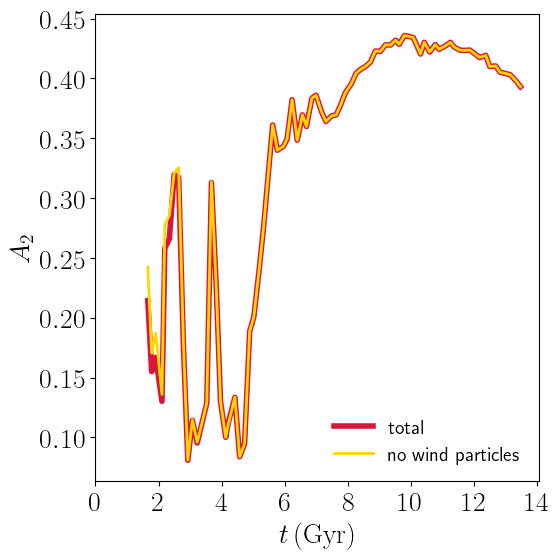

In [13]:
plt.figure(figsize=[6,6])
plt.plot(time[22:], A2[22:], color='crimson', lw=4, label='total')
plt.plot(time[22:], A2_[22:], color='gold', lw=2, label='no wind particles')
#plt.scatter(time[22:], A2[22:])
plt.xlabel('$t \, \mathrm{(Gyr)}$')#, fontsize=15)
plt.ylabel('$A_2$')#, fontsize=15)
plt.legend(loc='lower right', frameon=False, fontsize=14)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.tight_layout()
#plt.savefig('a2-comp.png')

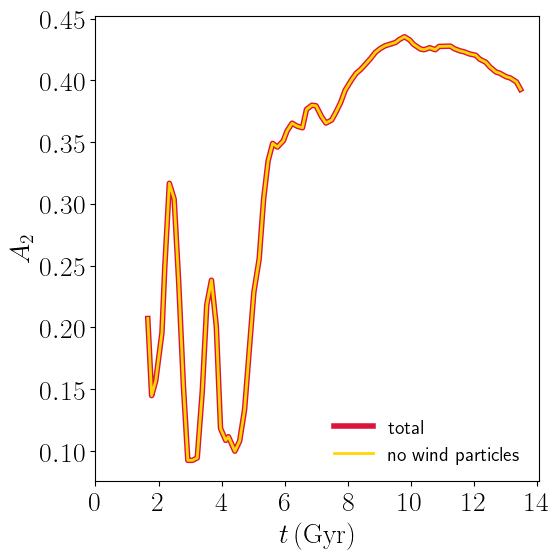

In [14]:
A2_smooth = savgol_filter(A2, window_length=6, polyorder=3)
A2_smooth_ = savgol_filter(A2, window_length=6, polyorder=3)

plt.figure(figsize=[6,6])
plt.plot(time[22:], A2_smooth[22:], color='crimson', lw=4, label='total')
plt.plot(time[22:], A2_smooth_[22:], color='gold', lw=2, label='no wind particles')
plt.xlabel('$t \, \mathrm{(Gyr)}$')#, fontsize=15)
plt.ylabel('$A_2$')#, fontsize=15)
plt.legend(loc='lower right', frameon=False, fontsize=14)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.tight_layout()
#plt.savefig('a2-comp-suave.png')

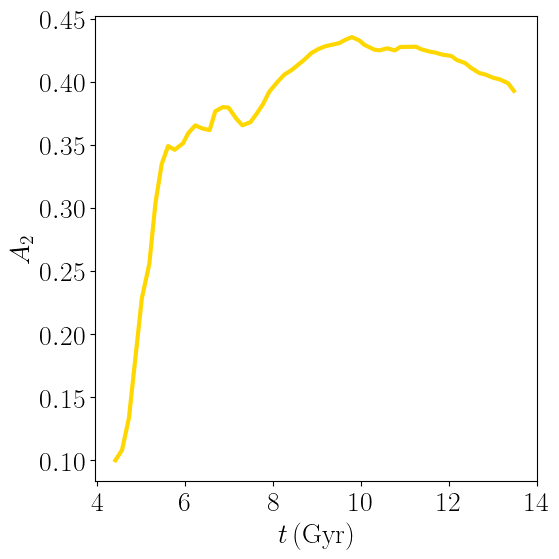

In [20]:
A2_smooth_ = savgol_filter(A2, window_length=6, polyorder=3)

plt.figure(figsize=[6,6])
plt.plot(time[41:], A2_smooth_[41:], color='gold', lw=3)#, label='no wind particles')
plt.xlabel('$t \, \mathrm{(Gyr)}$')#, fontsize=15)
plt.ylabel('$A_2$')#, fontsize=15)
#plt.legend(loc='lower right', frameon=False, fontsize=14)
plt.xticks([4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.tight_layout()
plt.savefig('a2-suave.png')

In [19]:
time[41]

4.416004044852551

Buckling

In [23]:
for j in range (2, n_snapshots):
    index = str(j).zfill(3)
    snapshot = path + f'snapshot{index}.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #tempo
    time[j] = f['Header'].attrs['Time']
            
    #ler info estrelas e corrigir posição
    f_star = f['PartType4']

    x_star = np.array(f_star['Coordinates'][:,0])
    y_star = np.array(f_star['Coordinates'][:,1])
    z_star = np.array(f_star['Coordinates'][:,2])
    m_star = np.array(f_star['Masses'])

    #excluindo wind particles
    cond = np.argwhere(np.array(f_star['GFM_StellarFormationTime']) >= 0).flatten()
    x_star2 = x_star[cond]
    y_star2 = y_star[cond]
    z_star2 = z_star[cond]
    m_star2 = m_star[cond]

    #selecionar partículas acima e abaixo de z=0
    up = np.argwhere(z_star2 > 0).flatten()
    down = np.argwhere(z_star2 < 0).flatten()

    x_up = x_star2[up]
    y_up = y_star2[up]
    m_up = m_star2[up]

    x_down = x_star2[down]
    y_down = y_star2[down]
    m_down = m_star2[down]
            
    #calcular assimetria
    buckling[j] = S(m_up, x_up, y_up, m_down, x_down, y_down, Rmax=6.0, Nbins=30,
                        n_snapshots=n_snapshots) 
        

In [33]:
time_b = time_buckling(buckling[41:], time[41:])
print(time_b)

4.5674790875268565


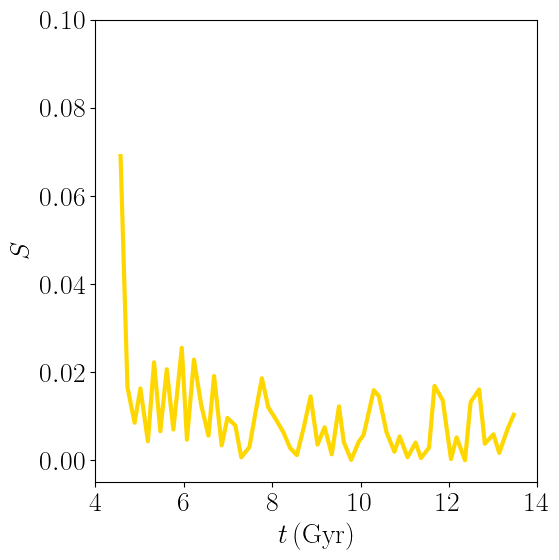

In [34]:
plt.figure(figsize=[6,6])
plt.plot(time[41:], buckling[41:], color='gold', lw=3)

plt.xlabel('$t \, \mathrm{(Gyr)}$')#, fontsize=15)
plt.ylabel('$S$')#, fontsize=15)
#plt.legend(loc='upper right', frameon=False, fontsize=14)
plt.ylim(-0.005, 0.1)
plt.xticks([4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.tight_layout()
#plt.savefig('S.png')

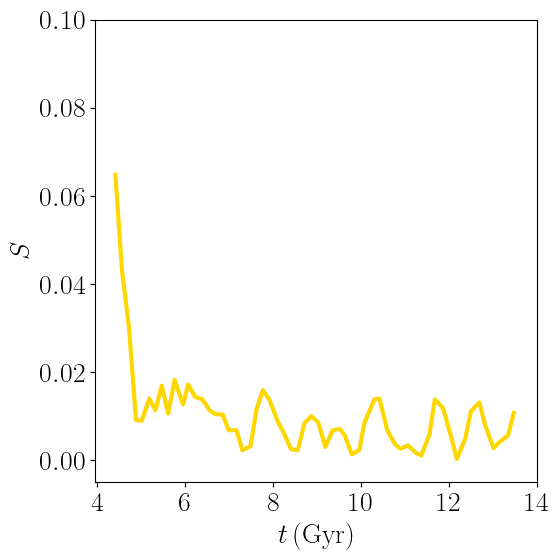

In [38]:
plt.figure(figsize=[6,6])
b_smooth = savgol_filter(buckling, window_length=5, polyorder=3)

plt.plot(time[41:], b_smooth[41:], color='gold', lw=3)
plt.xlabel('$t \, \mathrm{(Gyr)}$')#, fontsize=15)
plt.ylabel('$S$')#, fontsize=15)
#plt.legend(loc='upper right', frameon=False, fontsize=14)
plt.ylim(-0.005, 0.1)
plt.xticks([4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.tight_layout()
plt.savefig('S.png')